In [1]:
cd C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)


In [2]:
import os

directories = os.listdir()

filename = []
label = []

for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + "/" + files[j]
    label.append(directories[i])
    print(files[j])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\A
A/A1.jpg
A/A10.jpg
A/A11.jpg
A/A12.jpg
A/A13.jpg
A/A14.jpg
A/A15.jpg
A/A16.jpg
A/A17.jpg
A/A18.jpg
A/A19.jpg
A/A2.jpg
A/A20.jpg
A/A21.jpg
A/A22.jpg
A/A23.jpg
A/A24.jpg
A/A25.jpg
A/A26.jpg
A/A27.jpg
A/A28.jpg
A/A29.jpg
A/A3.jpg
A/A30.jpg
A/A31.jpg
A/A32.jpg
A/A33.jpg
A/A34.jpg
A/A35.jpg
A/A36.jpg
A/A37.jpg
A/A38.jpg
A/A39.jpg
A/A4.jpg
A/A40.jpg
A/A41.jpg
A/A42.jpg
A/A43.jpg
A/A44.jpg
A/A45.jpg
A/A46.jpg
A/A47.jpg
A/A48.jpg
A/A49.jpg
A/A5.jpg
A/A50.jpg
A/A51.jpg
A/A52.jpg
A/A53.jpg
A/A54.jpg
A/A55.jpg
A/A6.jpg
A/A7.jpg
A/A8.jpg
A/A9.jpg
C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\B
B/B1.jpg
B/B10.jpg
B/B11.jpg
B/B12.jpg
B/B13.jpg
B/B14.jpg
B/B15.jpg
B/B16.jpg
B/B17.jpg
B/B18.jpg
B/B19.jpg
B/B2.jpg
B/B20.jpg
B/B21.jpg
B/B22.jpg
B/B23.jpg
B/B24.jpg
B/B25.jpg
B/B26.jpg
B/B27.jpg
B/B28.jpg
B/B29.jpg
B/B3.jpg
B/B30.jpg
B/B31.jpg
B/B32.jpg
B/B33.jpg
B/B34.jpg
B/B35.jpg
B/B36.jpg
B/B37.jpg
B/B38.jp

P/P16.jpg
P/P17.jpg
P/P18.jpg
P/P19.jpg
P/P2.jpg
P/P20.jpg
P/P21.jpg
P/P22.jpg
P/P23.jpg
P/P24.jpg
P/P25.jpg
P/P26.jpg
P/P27.jpg
P/P28.jpg
P/P29.jpg
P/P3.jpg
P/P30.jpg
P/P31.jpg
P/P32.jpg
P/P33.jpg
P/P34.jpg
P/P35.jpg
P/P36.jpg
P/P37.jpg
P/P38.jpg
P/P39.jpg
P/P4.jpg
P/P40.jpg
P/P41.jpg
P/P42.jpg
P/P43.jpg
P/P44.jpg
P/P45.jpg
P/P46.jpg
P/P47.jpg
P/P48.jpg
P/P49.jpg
P/P5.jpg
P/P50.jpg
P/P51.jpg
P/P52.jpg
P/P53.jpg
P/P54.jpg
P/P55.jpg
P/P6.jpg
P/P7.jpg
P/P8.jpg
P/P9.jpg
C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\Q
Q/Q1.jpg
Q/Q10.jpg
Q/Q11.jpg
Q/Q12.jpg
Q/Q13.jpg
Q/Q14.jpg
Q/Q15.jpg
Q/Q16.jpg
Q/Q17.jpg
Q/Q18.jpg
Q/Q19.jpg
Q/Q2.jpg
Q/Q20.jpg
Q/Q21.jpg
Q/Q22.jpg
Q/Q23.jpg
Q/Q24.jpg
Q/Q25.jpg
Q/Q26.jpg
Q/Q27.jpg
Q/Q28.jpg
Q/Q29.jpg
Q/Q3.jpg
Q/Q30.jpg
Q/Q31.jpg
Q/Q32.jpg
Q/Q33.jpg
Q/Q34.jpg
Q/Q35.jpg
Q/Q36.jpg
Q/Q37.jpg
Q/Q38.jpg
Q/Q39.jpg
Q/Q4.jpg
Q/Q40.jpg
Q/Q41.jpg
Q/Q42.jpg
Q/Q43.jpg
Q/Q44.jpg
Q/Q45.jpg
Q/Q46.jpg
Q/Q47.jpg
Q/Q48.jpg
Q/Q49.jpg
Q/Q5.jpg
Q/Q50.jpg
Q

In [3]:
print(len(filename))

1430


In [4]:
import pandas as pd

data = {"filename": filename,
        "label": label}

df = pd.DataFrame(data = data)

In [5]:
print(df)

       filename label
0      A/A1.jpg     A
1     A/A10.jpg     A
2     A/A11.jpg     A
3     A/A12.jpg     A
4     A/A13.jpg     A
...         ...   ...
1425  Z/Z55.jpg     Z
1426   Z/Z6.jpg     Z
1427   Z/Z7.jpg     Z
1428   Z/Z8.jpg     Z
1429   Z/Z9.jpg     Z

[1430 rows x 2 columns]


In [6]:
#random image list
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

       filename label
483   I/I49.jpg     I
1392  Z/Z25.jpg     Z
541   J/J51.jpg     J
1214  W/W13.jpg     W
837   P/P20.jpg     P
...         ...   ...
1034   S/S5.jpg     S
496   J/J10.jpg     J
236   E/E24.jpg     E
1178  V/V30.jpg     V
443   I/I12.jpg     I

[1430 rows x 2 columns]


In [7]:
#cross validation

from sklearn.model_selection import KFold

train_data = df_shuffled

y = train_data[['label']]

# angka split nya 5
kf = KFold(n_splits = 5)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [8]:
#preprocessing data train dan data testing

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
#define penyimpanan dataset

image_dir = '/Users/USER/Downloads/PROJECT/DATASET_adaptive_mean_thresholding(3)'

In [10]:
#menyimpan model CNN terbaik

def get_model_name(k):
  return 'model_'+str(k)+'.h5'

In [11]:
#define akurasi

import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from pandas.core.algorithms import mode
import tensorflow
# from keras.backend import conv2d
# from warnings import filters
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
# from PIL import Image
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#BUILD AND TRAIN CNN MODEL

save_dir = '/saved_models_64_150/'
fold_var = 1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(y)),y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]
    
    train_data_generator = train_datagen.flow_from_dataframe(training_data, directory = image_dir, 
                                                             x_col = "filename", y_col = "label", 
                                                             target_size=(64, 64), batch_size=10, color_mode= "grayscale", 
                                                             class_mode = "categorical", shuffle = True)
    valid_data_generator = test_datagen.flow_from_dataframe(validation_data, directory = image_dir, 
                                                            x_col = "filename", y_col = "label", 
                                                            target_size=(64, 64), batch_size=10, color_mode="grayscale", 
                                                            class_mode = "categorical", shuffle = False)
    

    model = Sequential()
    
    #layer convolution 1
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Conv2D(filters=64, kernel_size=3, input_shape=[64, 64, 1]))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=64, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 2
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 3
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 4
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 5
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Flatten())
    
    #fully connected layer
    model.add(Dense(units=128))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(units=128))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
#     model.add(Dense(units=32, activation='relu'))
#     model.add(Dropout(0.40))
#     model.add(Dense(units=64))
#     model.add(Activation("relu"))
#     model.add(Dropout(0.5))
    model.add(Dense(units=26))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var), 
                                 monitor = 'val_accuracy', verbose = 1, 
                                 save_best_only = True, mode='max')
    
    callback_list = [checkpoint]
    model.summary()
    
    hist = model.fit(train_data_generator, epochs = 150, callbacks = callback_list, validation_data = valid_data_generator)

    model.load_weights("/saved_models_64_150/model_"+str(fold_var)+".h5")

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names, results))

    y_predict = model.predict(valid_data_generator)

    #get the label of validation data
    y = np.asarray(valid_data_generator.labels)

    #karena output multilabel adalah nilai 0 - 1 dari tiap class maka diambil yang terbesar
    y_predict_labels = np.argmax(y_predict, axis=1)

    acc = accuracy_score(y_predict_labels, y)
    prec = precision_score(y_predict_labels, y, average = 'weighted')
    rec = recall_score(y_predict_labels, y, average = 'weighted')
    f1score = f1_score(y_predict_labels, y, average = 'weighted')

    print("\n")
    print("Cross Validation: ", fold_var)
    print("Accuracy: ", results['accuracy'])
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("f1 score: ", f1score)
    print("\n")

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_PRECISION.append(prec)
    VALIDATION_RECALL.append(rec)
    VALIDATION_F1SCORE.append(f1score)

    LOSS.append(hist.history['loss'])
    ACCURACY.append(hist.history['accuracy'])

    VAL_LOSS.append(hist.history['val_loss'])
    VAL_ACCURACY.append(hist.history['val_accuracy'])

    CV.append("CV" +str(fold_var))

    #     clear_session()

    fold_var += 1

Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 64)       0         
 )                                                               
                                                                 

115/115 [==============================] - ETA: 0s - loss: 2.9441 - accuracy: 0.1652 
Epoch 6: val_accuracy did not improve from 0.06643
115/115 [==============================] - 1528s 13s/step - loss: 2.9441 - accuracy: 0.1652 - val_loss: 31.2250 - val_accuracy: 0.0455
Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 2.9634 - accuracy: 0.1731 
Epoch 7: val_accuracy improved from 0.06643 to 0.10839, saving model to /saved_models_64_100\model_1.h5
115/115 [==============================] - 1545s 13s/step - loss: 2.9634 - accuracy: 0.1731 - val_loss: 7.9208 - val_accuracy: 0.1084
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 2.8007 - accuracy: 0.1731 
Epoch 8: val_accuracy did not improve from 0.10839
115/115 [==============================] - 1530s 13s/step - loss: 2.8007 - accuracy: 0.1731 - val_loss: 15.0393 - val_accuracy: 0.0315
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 2.7516 - accuracy: 0.1879 
Epoch 9: v

115/115 [==============================] - ETA: 0s - loss: 2.4665 - accuracy: 0.2456 
Epoch 34: val_accuracy did not improve from 0.26224
115/115 [==============================] - 1536s 13s/step - loss: 2.4665 - accuracy: 0.2456 - val_loss: 8.9457 - val_accuracy: 0.0804
Epoch 35/150
115/115 [==============================] - ETA: 0s - loss: 2.3913 - accuracy: 0.2491 
Epoch 35: val_accuracy did not improve from 0.26224
115/115 [==============================] - 1544s 13s/step - loss: 2.3913 - accuracy: 0.2491 - val_loss: 10.1642 - val_accuracy: 0.0664
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.4006 - accuracy: 0.2448 
Epoch 36: val_accuracy did not improve from 0.26224
115/115 [==============================] - 1539s 13s/step - loss: 2.4006 - accuracy: 0.2448 - val_loss: 8.8427 - val_accuracy: 0.0734
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.3749 - accuracy: 0.2535 
Epoch 37: val_accuracy did not improve from 0.26224
115/11

115/115 [==============================] - 1540s 13s/step - loss: 2.2817 - accuracy: 0.2937 - val_loss: 2.5928 - val_accuracy: 0.2448
Epoch 63/150
115/115 [==============================] - ETA: 0s - loss: 2.2502 - accuracy: 0.3016 
Epoch 63: val_accuracy did not improve from 0.37063
115/115 [==============================] - 1540s 13s/step - loss: 2.2502 - accuracy: 0.3016 - val_loss: 6.5575 - val_accuracy: 0.0734
Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.2579 - accuracy: 0.2771 
Epoch 64: val_accuracy did not improve from 0.37063
115/115 [==============================] - 1540s 13s/step - loss: 2.2579 - accuracy: 0.2771 - val_loss: 5.5685 - val_accuracy: 0.0664
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.2603 - accuracy: 0.3007 
Epoch 65: val_accuracy did not improve from 0.37063
115/115 [==============================] - 1538s 13s/step - loss: 2.2603 - accuracy: 0.3007 - val_loss: 11.4721 - val_accuracy: 0.0420
Epoch 66/1

Epoch 91/150
115/115 [==============================] - ETA: 0s - loss: 2.1701 - accuracy: 0.3077 
Epoch 91: val_accuracy did not improve from 0.45804
115/115 [==============================] - 1543s 13s/step - loss: 2.1701 - accuracy: 0.3077 - val_loss: 3.6249 - val_accuracy: 0.1748
Epoch 92/150
115/115 [==============================] - ETA: 0s - loss: 2.2174 - accuracy: 0.2955 
Epoch 92: val_accuracy did not improve from 0.45804
115/115 [==============================] - 1542s 13s/step - loss: 2.2174 - accuracy: 0.2955 - val_loss: 1.8473 - val_accuracy: 0.4126
Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.1787 - accuracy: 0.3164 
Epoch 93: val_accuracy did not improve from 0.45804
115/115 [==============================] - 1539s 13s/step - loss: 2.1787 - accuracy: 0.3164 - val_loss: 1537.3169 - val_accuracy: 0.0559
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.2879 - accuracy: 0.2963 
Epoch 94: val_accuracy did not improve from

115/115 [==============================] - 1540s 13s/step - loss: 2.2193 - accuracy: 0.2946 - val_loss: 3.0518 - val_accuracy: 0.1993
Epoch 120/150
115/115 [==============================] - ETA: 0s - loss: 2.2051 - accuracy: 0.2946 
Epoch 120: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1536s 13s/step - loss: 2.2051 - accuracy: 0.2946 - val_loss: 6.2156 - val_accuracy: 0.0594
Epoch 121/150
115/115 [==============================] - ETA: 0s - loss: 2.1653 - accuracy: 0.3234 
Epoch 121: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1538s 13s/step - loss: 2.1653 - accuracy: 0.3234 - val_loss: 2.6916 - val_accuracy: 0.2133
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.1850 - accuracy: 0.3278 
Epoch 122: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1537s 13s/step - loss: 2.1850 - accuracy: 0.3278 - val_loss: 9.1427 - val_accuracy: 0.0839
Epoch

115/115 [==============================] - ETA: 0s - loss: 3.2879 - accuracy: 0.0402 
Epoch 148: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1512s 13s/step - loss: 3.2879 - accuracy: 0.0402 - val_loss: nan - val_accuracy: 0.0490
Epoch 149/150
115/115 [==============================] - ETA: 0s - loss: 3.2818 - accuracy: 0.0446 
Epoch 149: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1513s 13s/step - loss: 3.2818 - accuracy: 0.0446 - val_loss: nan - val_accuracy: 0.0490
Epoch 150/150
115/115 [==============================] - ETA: 0s - loss: 3.2821 - accuracy: 0.0367 
Epoch 150: val_accuracy did not improve from 0.46503
29/29 [==============================] - 101s 3s/step


Cross Validation:  1
Accuracy:  0.46503496170043945
Precision:  0.657781850045836
Recall:  0.46503496503496505
f1 score:  0.4903779199772293


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filena

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 activation_16 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 activation_17 (Activation)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 57, 57, 128)       73856     
                                                      

Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 2.9391 - accuracy: 0.1530 
Epoch 7: val_accuracy did not improve from 0.10839
115/115 [==============================] - 1542s 13s/step - loss: 2.9391 - accuracy: 0.1530 - val_loss: 97283.7344 - val_accuracy: 0.0699
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 2.8208 - accuracy: 0.1696 
Epoch 8: val_accuracy did not improve from 0.10839
115/115 [==============================] - 1544s 13s/step - loss: 2.8208 - accuracy: 0.1696 - val_loss: 16.9608 - val_accuracy: 0.0594
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 2.8087 - accuracy: 0.1801 
Epoch 9: val_accuracy did not improve from 0.10839
115/115 [==============================] - 1543s 13s/step - loss: 2.8087 - accuracy: 0.1801 - val_loss: 8.2221 - val_accuracy: 0.0629
Epoch 10/150
115/115 [==============================] - ETA: 0s - loss: 2.6937 - accuracy: 0.1897 
Epoch 10: val_accuracy improved from 0.10839 to

115/115 [==============================] - ETA: 0s - loss: 2.3429 - accuracy: 0.2631 
Epoch 35: val_accuracy did not improve from 0.20280
115/115 [==============================] - 1552s 14s/step - loss: 2.3429 - accuracy: 0.2631 - val_loss: 4.9650 - val_accuracy: 0.0944
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.3269 - accuracy: 0.2920 
Epoch 36: val_accuracy improved from 0.20280 to 0.32517, saving model to /saved_models_64_100\model_2.h5
115/115 [==============================] - 1569s 14s/step - loss: 2.3269 - accuracy: 0.2920 - val_loss: 2.1128 - val_accuracy: 0.3252
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.3065 - accuracy: 0.2666 
Epoch 37: val_accuracy did not improve from 0.32517
115/115 [==============================] - 1553s 14s/step - loss: 2.3065 - accuracy: 0.2666 - val_loss: 5.3398 - val_accuracy: 0.1154
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.3279 - accuracy: 0.2797 
Epoch 

115/115 [==============================] - ETA: 0s - loss: 2.2683 - accuracy: 0.2850 
Epoch 63: val_accuracy did not improve from 0.38112
115/115 [==============================] - 1542s 13s/step - loss: 2.2683 - accuracy: 0.2850 - val_loss: 7.2446 - val_accuracy: 0.1224
Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.2567 - accuracy: 0.2981 
Epoch 64: val_accuracy did not improve from 0.38112
115/115 [==============================] - 1545s 13s/step - loss: 2.2567 - accuracy: 0.2981 - val_loss: 3.2640 - val_accuracy: 0.1469
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.2599 - accuracy: 0.2928 
Epoch 65: val_accuracy did not improve from 0.38112
115/115 [==============================] - 1544s 13s/step - loss: 2.2599 - accuracy: 0.2928 - val_loss: 2.7235 - val_accuracy: 0.2552
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.2323 - accuracy: 0.2902 
Epoch 66: val_accuracy did not improve from 0.38112
115/115

Epoch 92/150
115/115 [==============================] - ETA: 0s - loss: 2.1895 - accuracy: 0.3086 
Epoch 92: val_accuracy did not improve from 0.39161
115/115 [==============================] - 1552s 13s/step - loss: 2.1895 - accuracy: 0.3086 - val_loss: 3.0421 - val_accuracy: 0.1573
Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.2497 - accuracy: 0.2911 
Epoch 93: val_accuracy did not improve from 0.39161
115/115 [==============================] - 1545s 13s/step - loss: 2.2497 - accuracy: 0.2911 - val_loss: 3.5820 - val_accuracy: 0.1154
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.1194 - accuracy: 0.3199 
Epoch 94: val_accuracy did not improve from 0.39161
115/115 [==============================] - 1543s 13s/step - loss: 2.1194 - accuracy: 0.3199 - val_loss: 2.1410 - val_accuracy: 0.2832
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.1169 - accuracy: 0.3470 
Epoch 95: val_accuracy did not improve from 0.

115/115 [==============================] - ETA: 0s - loss: 2.1735 - accuracy: 0.3374 
Epoch 120: val_accuracy improved from 0.40210 to 0.41608, saving model to /saved_models_64_100\model_2.h5
115/115 [==============================] - 1552s 14s/step - loss: 2.1735 - accuracy: 0.3374 - val_loss: 1.8055 - val_accuracy: 0.4161
Epoch 121/150
115/115 [==============================] - ETA: 0s - loss: 2.1225 - accuracy: 0.3182 
Epoch 121: val_accuracy did not improve from 0.41608
115/115 [==============================] - 1539s 13s/step - loss: 2.1225 - accuracy: 0.3182 - val_loss: 2.0065 - val_accuracy: 0.3182
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.1707 - accuracy: 0.3156 
Epoch 122: val_accuracy did not improve from 0.41608
115/115 [==============================] - 1542s 13s/step - loss: 2.1707 - accuracy: 0.3156 - val_loss: 4.2346 - val_accuracy: 0.1294
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.1674 - accuracy: 0.3042 


115/115 [==============================] - 1552s 13s/step - loss: 2.1414 - accuracy: 0.3182 - val_loss: 2.5703 - val_accuracy: 0.2063
Epoch 149/150
115/115 [==============================] - ETA: 0s - loss: 2.0679 - accuracy: 0.3505 
Epoch 149: val_accuracy did not improve from 0.41608
115/115 [==============================] - 1551s 13s/step - loss: 2.0679 - accuracy: 0.3505 - val_loss: 2.3568 - val_accuracy: 0.2867
Epoch 150/150
115/115 [==============================] - ETA: 0s - loss: 2.1805 - accuracy: 0.3217 
Epoch 150: val_accuracy did not improve from 0.41608
29/29 [==============================] - 102s 4s/step


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Cross Validation:  2
Accuracy:  0.4160839021205902
Precision:  0.5822571202507443
Recall:  0.4160839160839161
f1 score:  0.4363602939035791


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 activation_32 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 activation_33 (Activation)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 59, 59, 64)   

Epoch 6/150
115/115 [==============================] - ETA: 0s - loss: 3.0494 - accuracy: 0.1320 
Epoch 6: val_accuracy improved from 0.03497 to 0.04895, saving model to /saved_models_64_100\model_3.h5
115/115 [==============================] - 1551s 13s/step - loss: 3.0494 - accuracy: 0.1320 - val_loss: 28.0810 - val_accuracy: 0.0490
Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 2.9664 - accuracy: 0.1643 
Epoch 7: val_accuracy did not improve from 0.04895
115/115 [==============================] - 1540s 13s/step - loss: 2.9664 - accuracy: 0.1643 - val_loss: 17.8451 - val_accuracy: 0.0315
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 2.8841 - accuracy: 0.1652 
Epoch 8: val_accuracy improved from 0.04895 to 0.16783, saving model to /saved_models_64_100\model_3.h5
115/115 [==============================] - 1554s 14s/step - loss: 2.8841 - accuracy: 0.1652 - val_loss: 3.7010 - val_accuracy: 0.1678
Epoch 9/150
115/115 [======================

115/115 [==============================] - 1557s 14s/step - loss: 2.3600 - accuracy: 0.2684 - val_loss: 2.1266 - val_accuracy: 0.3846
Epoch 34/150
115/115 [==============================] - ETA: 0s - loss: 2.4131 - accuracy: 0.2316 
Epoch 34: val_accuracy did not improve from 0.38462
115/115 [==============================] - 1541s 13s/step - loss: 2.4131 - accuracy: 0.2316 - val_loss: 18.5799 - val_accuracy: 0.0280
Epoch 35/150
115/115 [==============================] - ETA: 0s - loss: 2.3469 - accuracy: 0.2727 
Epoch 35: val_accuracy did not improve from 0.38462
115/115 [==============================] - 1542s 13s/step - loss: 2.3469 - accuracy: 0.2727 - val_loss: 8.8658 - val_accuracy: 0.0350
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.2871 - accuracy: 0.2649 
Epoch 36: val_accuracy did not improve from 0.38462
115/115 [==============================] - 1543s 13s/step - loss: 2.2871 - accuracy: 0.2649 - val_loss: 6.8661 - val_accuracy: 0.0524
Epoch 37/1

Epoch 62/150
115/115 [==============================] - ETA: 0s - loss: 2.2095 - accuracy: 0.2955 
Epoch 62: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1546s 13s/step - loss: 2.2095 - accuracy: 0.2955 - val_loss: 12.3038 - val_accuracy: 0.0315
Epoch 63/150
115/115 [==============================] - ETA: 0s - loss: 2.2607 - accuracy: 0.2893 
Epoch 63: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1553s 14s/step - loss: 2.2607 - accuracy: 0.2893 - val_loss: 1.7404 - val_accuracy: 0.4336
Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.2161 - accuracy: 0.2955 
Epoch 64: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1547s 13s/step - loss: 2.2161 - accuracy: 0.2955 - val_loss: 6.0301 - val_accuracy: 0.0734
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.2567 - accuracy: 0.2972 
Epoch 65: val_accuracy did not improve from 0

Epoch 91/150
115/115 [==============================] - ETA: 0s - loss: 2.9316 - accuracy: 0.1731 
Epoch 91: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1541s 13s/step - loss: 2.9316 - accuracy: 0.1731 - val_loss: nan - val_accuracy: 0.0350
Epoch 92/150
115/115 [==============================] - ETA: 0s - loss: 2.2818 - accuracy: 0.2832 
Epoch 92: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1546s 13s/step - loss: 2.2818 - accuracy: 0.2832 - val_loss: nan - val_accuracy: 0.0350
Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.3165 - accuracy: 0.2815 
Epoch 93: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1546s 13s/step - loss: 2.3165 - accuracy: 0.2815 - val_loss: nan - val_accuracy: 0.0350
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.9691 - accuracy: 0.1416 
Epoch 94: val_accuracy did not improve from 0.46503
115

Epoch 120/150
115/115 [==============================] - ETA: 0s - loss: 2.6867 - accuracy: 0.1923 
Epoch 120: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1546s 13s/step - loss: 2.6867 - accuracy: 0.1923 - val_loss: nan - val_accuracy: 0.0350
Epoch 121/150
115/115 [==============================] - ETA: 0s - loss: 2.6840 - accuracy: 0.1967 
Epoch 121: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1544s 13s/step - loss: 2.6840 - accuracy: 0.1967 - val_loss: nan - val_accuracy: 0.0350
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.3648 - accuracy: 0.2675 
Epoch 122: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1549s 13s/step - loss: 2.3648 - accuracy: 0.2675 - val_loss: nan - val_accuracy: 0.0350
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.5535 - accuracy: 0.2194 
Epoch 123: val_accuracy did not improve from 0.4

Epoch 149/150
115/115 [==============================] - ETA: 0s - loss: 3.1324 - accuracy: 0.0927 
Epoch 149: val_accuracy did not improve from 0.46503
115/115 [==============================] - 1533s 13s/step - loss: 3.1324 - accuracy: 0.0927 - val_loss: nan - val_accuracy: 0.0350
Epoch 150/150
115/115 [==============================] - ETA: 0s - loss: 2.6055 - accuracy: 0.2124 
Epoch 150: val_accuracy did not improve from 0.46503
29/29 [==============================] - 102s 4s/step


Cross Validation:  3
Accuracy:  0.46503496170043945
Precision:  0.6669001453092361
Recall:  0.46503496503496505
f1 score:  0.5195798390521176


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 activation_48 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 activation_49 (Activation)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 57, 57, 128)       73856     
                                                      

Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 2.8444 - accuracy: 0.1801 
Epoch 7: val_accuracy did not improve from 0.19580
115/115 [==============================] - 1546s 13s/step - loss: 2.8444 - accuracy: 0.1801 - val_loss: 5.5049 - val_accuracy: 0.1503
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 2.8477 - accuracy: 0.1774 
Epoch 8: val_accuracy did not improve from 0.19580
115/115 [==============================] - 1547s 13s/step - loss: 2.8477 - accuracy: 0.1774 - val_loss: 5.6889 - val_accuracy: 0.0874
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 2.7038 - accuracy: 0.1906 
Epoch 9: val_accuracy did not improve from 0.19580
115/115 [==============================] - 1551s 13s/step - loss: 2.7038 - accuracy: 0.1906 - val_loss: 3.3455 - val_accuracy: 0.1958
Epoch 10/150
115/115 [==============================] - ETA: 0s - loss: 2.6816 - accuracy: 0.1941 
Epoch 10: val_accuracy did not improve from 0.19580


115/115 [==============================] - 1552s 14s/step - loss: 2.3151 - accuracy: 0.2762 - val_loss: 4.0801 - val_accuracy: 0.0804
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.3722 - accuracy: 0.2797 
Epoch 36: val_accuracy did not improve from 0.36364
115/115 [==============================] - 1553s 14s/step - loss: 2.3722 - accuracy: 0.2797 - val_loss: 9.3031 - val_accuracy: 0.0594
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.2910 - accuracy: 0.2762 
Epoch 37: val_accuracy did not improve from 0.36364
115/115 [==============================] - 1555s 14s/step - loss: 2.2910 - accuracy: 0.2762 - val_loss: 2.7942 - val_accuracy: 0.1818
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.3513 - accuracy: 0.2710 
Epoch 38: val_accuracy did not improve from 0.36364
115/115 [==============================] - 1551s 13s/step - loss: 2.3513 - accuracy: 0.2710 - val_loss: 2.7535 - val_accuracy: 0.1958
Epoch 39/15

115/115 [==============================] - 1549s 13s/step - loss: 2.2330 - accuracy: 0.2850 - val_loss: 3.6397 - val_accuracy: 0.0979
Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.2082 - accuracy: 0.3313 
Epoch 64: val_accuracy did not improve from 0.43007
115/115 [==============================] - 1551s 13s/step - loss: 2.2082 - accuracy: 0.3313 - val_loss: 2.7113 - val_accuracy: 0.2028
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.2403 - accuracy: 0.2955 
Epoch 65: val_accuracy did not improve from 0.43007
115/115 [==============================] - 1553s 14s/step - loss: 2.2403 - accuracy: 0.2955 - val_loss: 2.0484 - val_accuracy: 0.3392
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.2300 - accuracy: 0.2937 
Epoch 66: val_accuracy did not improve from 0.43007
115/115 [==============================] - 1552s 14s/step - loss: 2.2300 - accuracy: 0.2937 - val_loss: 5.0703 - val_accuracy: 0.1189
Epoch 67/15

115/115 [==============================] - ETA: 0s - loss: 2.4435 - accuracy: 0.2483 
Epoch 92: val_accuracy did not improve from 0.46154
115/115 [==============================] - 1553s 14s/step - loss: 2.4435 - accuracy: 0.2483 - val_loss: nan - val_accuracy: 0.0280
Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.5804 - accuracy: 0.2386 
Epoch 93: val_accuracy did not improve from 0.46154
115/115 [==============================] - 1553s 14s/step - loss: 2.5804 - accuracy: 0.2386 - val_loss: nan - val_accuracy: 0.0280
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.3817 - accuracy: 0.2579 
Epoch 94: val_accuracy did not improve from 0.46154
115/115 [==============================] - 1552s 14s/step - loss: 2.3817 - accuracy: 0.2579 - val_loss: nan - val_accuracy: 0.0280
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.5500 - accuracy: 0.2203 
Epoch 95: val_accuracy did not improve from 0.46154
115/115 [=======

Epoch 121/150
115/115 [==============================] - ETA: 0s - loss: 2.3557 - accuracy: 0.2710 
Epoch 121: val_accuracy did not improve from 0.46154
115/115 [==============================] - 1548s 13s/step - loss: 2.3557 - accuracy: 0.2710 - val_loss: nan - val_accuracy: 0.0280
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.1116 - accuracy: 0.3260 
Epoch 122: val_accuracy did not improve from 0.46154
115/115 [==============================] - 1551s 13s/step - loss: 2.1116 - accuracy: 0.3260 - val_loss: nan - val_accuracy: 0.0280
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.1751 - accuracy: 0.3086 
Epoch 123: val_accuracy did not improve from 0.46154
115/115 [==============================] - 1549s 13s/step - loss: 2.1751 - accuracy: 0.3086 - val_loss: nan - val_accuracy: 0.0280
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.3574 - accuracy: 0.2666 
Epoch 124: val_accuracy did not improve from 0.4

Epoch 150/150
115/115 [==============================] - ETA: 0s - loss: 2.4497 - accuracy: 0.2474 
Epoch 150: val_accuracy did not improve from 0.46154
29/29 [==============================] - 103s 4s/step


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Cross Validation:  4
Accuracy:  0.4615384638309479
Precision:  0.5602736395877079
Recall:  0.46153846153846156
f1 score:  0.46809604501204094


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 activation_64 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 activation_65 (Activation)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 59, 59, 64) 

Epoch 6/150
115/115 [==============================] - ETA: 0s - loss: 2.8784 - accuracy: 0.1705 
Epoch 6: val_accuracy improved from 0.04196 to 0.11538, saving model to /saved_models_64_100\model_5.h5
115/115 [==============================] - 1559s 14s/step - loss: 2.8784 - accuracy: 0.1705 - val_loss: 6253.1333 - val_accuracy: 0.1154
Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 2.8731 - accuracy: 0.1783 
Epoch 7: val_accuracy did not improve from 0.11538
115/115 [==============================] - 1552s 14s/step - loss: 2.8731 - accuracy: 0.1783 - val_loss: 69636.1562 - val_accuracy: 0.0524
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 2.7666 - accuracy: 0.1827 
Epoch 8: val_accuracy improved from 0.11538 to 0.15734, saving model to /saved_models_64_100\model_5.h5
115/115 [==============================] - 1564s 14s/step - loss: 2.7666 - accuracy: 0.1827 - val_loss: 3.8537 - val_accuracy: 0.1573
Epoch 9/150
115/115 [=================

115/115 [==============================] - ETA: 0s - loss: 2.3138 - accuracy: 0.2788 
Epoch 34: val_accuracy did not improve from 0.17832
115/115 [==============================] - 1567s 14s/step - loss: 2.3138 - accuracy: 0.2788 - val_loss: 6.7808 - val_accuracy: 0.0769
Epoch 35/150
115/115 [==============================] - ETA: 0s - loss: 2.3621 - accuracy: 0.2666 
Epoch 35: val_accuracy did not improve from 0.17832
115/115 [==============================] - 1570s 14s/step - loss: 2.3621 - accuracy: 0.2666 - val_loss: 6.6878 - val_accuracy: 0.0734
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.3380 - accuracy: 0.2893 
Epoch 36: val_accuracy did not improve from 0.17832
115/115 [==============================] - 1567s 14s/step - loss: 2.3380 - accuracy: 0.2893 - val_loss: 8.9650 - val_accuracy: 0.0874
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.3578 - accuracy: 0.2666 
Epoch 37: val_accuracy did not improve from 0.17832
115/115

115/115 [==============================] - ETA: 0s - loss: 2.2490 - accuracy: 0.3059 
Epoch 62: val_accuracy did not improve from 0.36014
115/115 [==============================] - 1566s 14s/step - loss: 2.2490 - accuracy: 0.3059 - val_loss: 4.8347 - val_accuracy: 0.0874
Epoch 63/150
115/115 [==============================] - ETA: 0s - loss: 2.3049 - accuracy: 0.2928 
Epoch 63: val_accuracy did not improve from 0.36014
115/115 [==============================] - 1571s 14s/step - loss: 2.3049 - accuracy: 0.2928 - val_loss: 3.1089 - val_accuracy: 0.1748
Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.3094 - accuracy: 0.2719 
Epoch 64: val_accuracy did not improve from 0.36014
115/115 [==============================] - 1568s 14s/step - loss: 2.3094 - accuracy: 0.2719 - val_loss: 5.9265 - val_accuracy: 0.0769
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.2603 - accuracy: 0.2928 
Epoch 65: val_accuracy did not improve from 0.36014
115/115

115/115 [==============================] - 1567s 14s/step - loss: 2.1836 - accuracy: 0.3234 - val_loss: 5.4179 - val_accuracy: 0.1364
Epoch 91/150
115/115 [==============================] - ETA: 0s - loss: 2.1292 - accuracy: 0.3322 
Epoch 91: val_accuracy did not improve from 0.43706
115/115 [==============================] - 1565s 14s/step - loss: 2.1292 - accuracy: 0.3322 - val_loss: 3.3771 - val_accuracy: 0.1154
Epoch 92/150
115/115 [==============================] - ETA: 0s - loss: 2.1665 - accuracy: 0.3199 
Epoch 92: val_accuracy did not improve from 0.43706
115/115 [==============================] - 1564s 14s/step - loss: 2.1665 - accuracy: 0.3199 - val_loss: 4.0941 - val_accuracy: 0.1224
Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.2414 - accuracy: 0.3094 
Epoch 93: val_accuracy did not improve from 0.43706
115/115 [==============================] - 1552s 14s/step - loss: 2.2414 - accuracy: 0.3094 - val_loss: 1.8456 - val_accuracy: 0.4126
Epoch 94/15

115/115 [==============================] - ETA: 0s - loss: 3.2938 - accuracy: 0.0323 
Epoch 119: val_accuracy did not improve from 0.43706
115/115 [==============================] - 1529s 13s/step - loss: 3.2938 - accuracy: 0.0323 - val_loss: nan - val_accuracy: 0.0559
Epoch 120/150
115/115 [==============================] - ETA: 0s - loss: 2.9697 - accuracy: 0.1163 
Epoch 120: val_accuracy did not improve from 0.43706
115/115 [==============================] - 1547s 13s/step - loss: 2.9697 - accuracy: 0.1163 - val_loss: nan - val_accuracy: 0.0559
Epoch 121/150
115/115 [==============================] - ETA: 0s - loss: 2.7208 - accuracy: 0.1722 
Epoch 121: val_accuracy did not improve from 0.43706
115/115 [==============================] - 1551s 14s/step - loss: 2.7208 - accuracy: 0.1722 - val_loss: nan - val_accuracy: 0.0559
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.7786 - accuracy: 0.1608 
Epoch 122: val_accuracy did not improve from 0.43706
115/115 [

Epoch 148/150
115/115 [==============================] - ETA: 0s - loss: 3.2880 - accuracy: 0.0402 
Epoch 148: val_accuracy did not improve from 0.43706
115/115 [==============================] - 1534s 13s/step - loss: 3.2880 - accuracy: 0.0402 - val_loss: nan - val_accuracy: 0.0559
Epoch 149/150
115/115 [==============================] - ETA: 0s - loss: 3.2830 - accuracy: 0.0358 
Epoch 149: val_accuracy did not improve from 0.43706
115/115 [==============================] - 1532s 13s/step - loss: 3.2830 - accuracy: 0.0358 - val_loss: nan - val_accuracy: 0.0559
Epoch 150/150
115/115 [==============================] - ETA: 0s - loss: 3.2738 - accuracy: 0.0341 
Epoch 150: val_accuracy did not improve from 0.43706
29/29 [==============================] - 104s 4s/step


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Cross Validation:  5
Accuracy:  0.43706294894218445
Precision:  0.5922403111651363
Recall:  0.4370629370629371
f1 score:  0.4382541849637949




Matplotlib is building the font cache; this may take a moment.


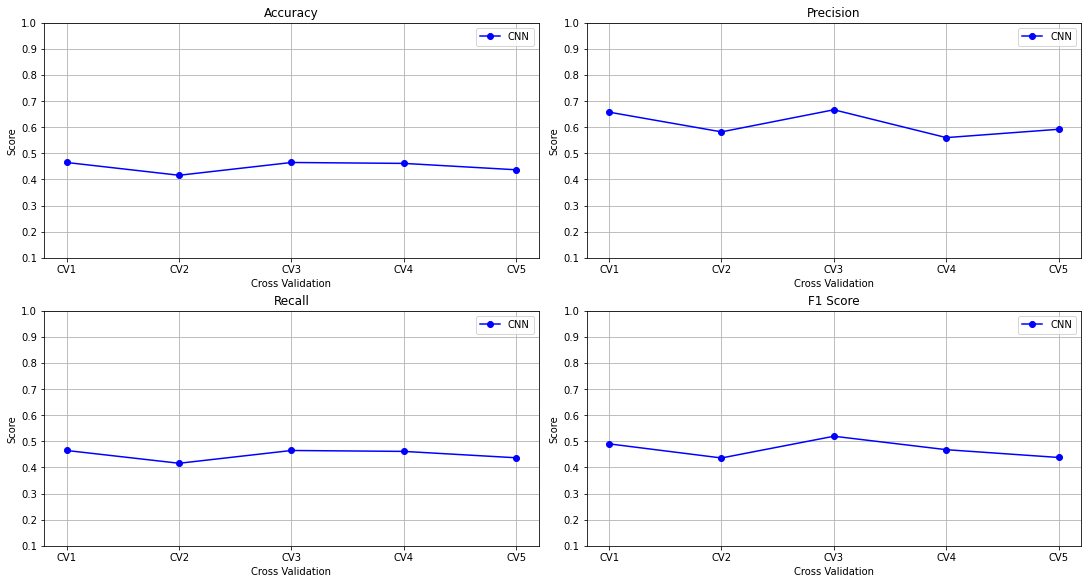

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = "CNN")
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.1, 1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_PRECISION, color='blue', marker='o', label = "CNN")
axs[0,1].set_title('Precision')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.1, 1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_RECALL, color='blue', marker='o', label = "CNN")
axs[1,0].set_title('Recall')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.1, 1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_F1SCORE, color='blue', marker='o', label = "CNN")
axs[1,1].set_title('F1 Score')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.1, 1))
axs[1,1].grid()
axs[1,1].legend()

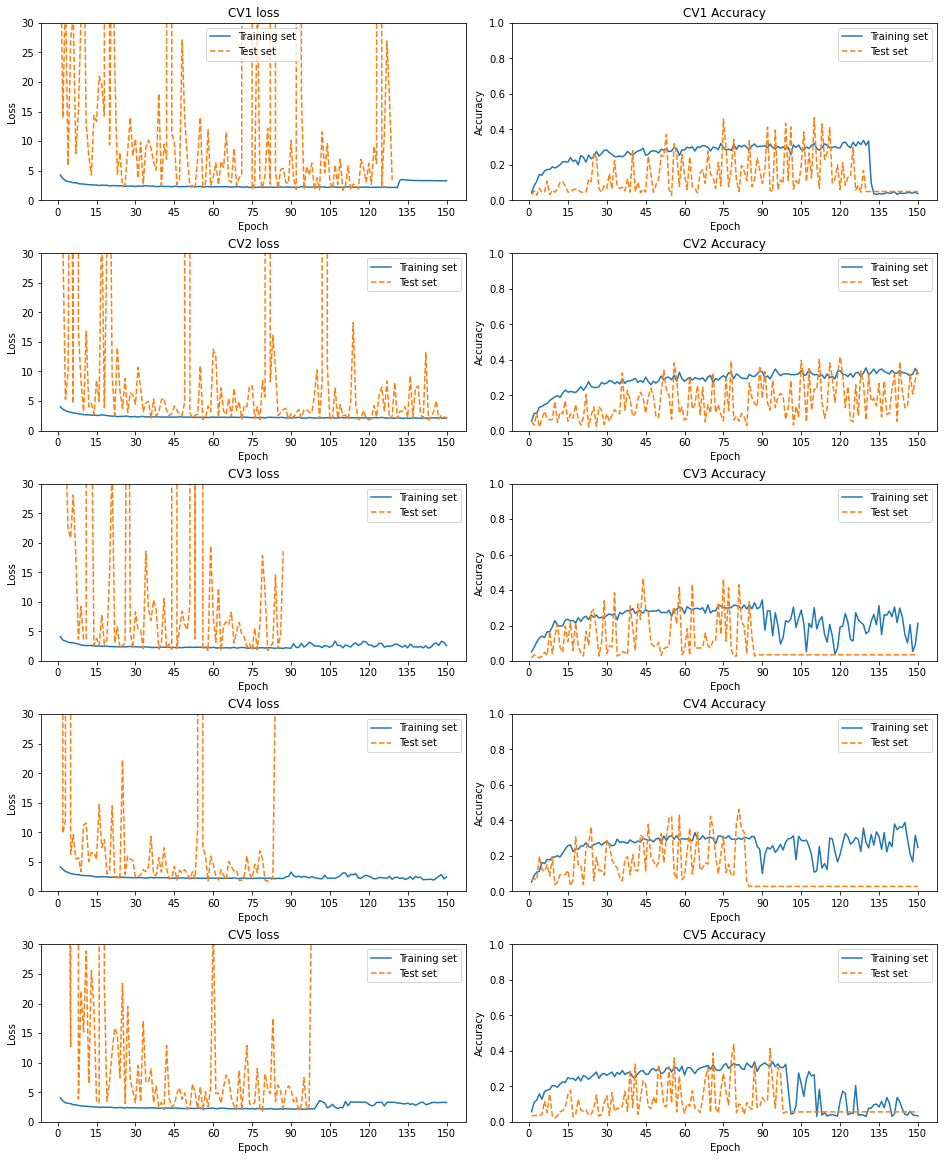

In [16]:
import matplotlib.pyplot as plt

n_epochs = 150
#set the x axis start from 1
x_axis = np.arange(1,151)

fig, ax = plt.subplots(5,2,constrained_layout=True, figsize=(13,16))

for i in range(5):
    for j in range(2):
        if(j==0):
            ax[i,j].set_title('CV' +str(i+1) + ' loss')
            ax[i,j].set_ylabel('Loss')
            ax[i,j].plot(x_axis, LOSS[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_LOSS[i], label='Test set', linestyle='--')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 30))
            ax[i,j].set_xticks(np.arange(0, 151, 15))
            ax[i,j].legend()
        else:
            ax[i,j].set_title('CV' +str(i+1) + ' Accuracy')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylabel('Accuracy')
            ax[i,j].plot(x_axis, ACCURACY[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_ACCURACY[i], label='Test set', linestyle='--')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 1))
            ax[i,j].set_xticks(np.arange(0, 151, 15))
            ax[i,j].legend()

In [17]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filter, bias = layer.get_weights()
    print(layer.name, filter.shape)

conv2d_52 (3, 3, 1, 64)
conv2d_53 (3, 3, 64, 64)
conv2d_54 (3, 3, 64, 128)
conv2d_55 (3, 3, 128, 128)
conv2d_56 (3, 3, 128, 256)
conv2d_57 (3, 3, 256, 256)
conv2d_58 (3, 3, 256, 256)
conv2d_59 (3, 3, 256, 512)
conv2d_60 (3, 3, 512, 512)
conv2d_61 (3, 3, 512, 512)
conv2d_62 (3, 3, 512, 512)
conv2d_63 (3, 3, 512, 512)
conv2d_64 (3, 3, 512, 512)


In [19]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_52 (None, 62, 62, 64)
2 conv2d_53 (None, 60, 60, 64)
5 conv2d_54 (None, 57, 57, 128)
7 conv2d_55 (None, 55, 55, 128)
10 conv2d_56 (None, 52, 52, 256)
12 conv2d_57 (None, 50, 50, 256)
14 conv2d_58 (None, 48, 48, 256)
17 conv2d_59 (None, 45, 45, 512)
19 conv2d_60 (None, 43, 43, 512)
21 conv2d_61 (None, 41, 41, 512)
24 conv2d_62 (None, 38, 38, 512)
26 conv2d_63 (None, 36, 36, 512)
28 conv2d_64 (None, 34, 34, 512)


In [21]:
from tensorflow.keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

1/1 [==============================] - 0s 21ms/step


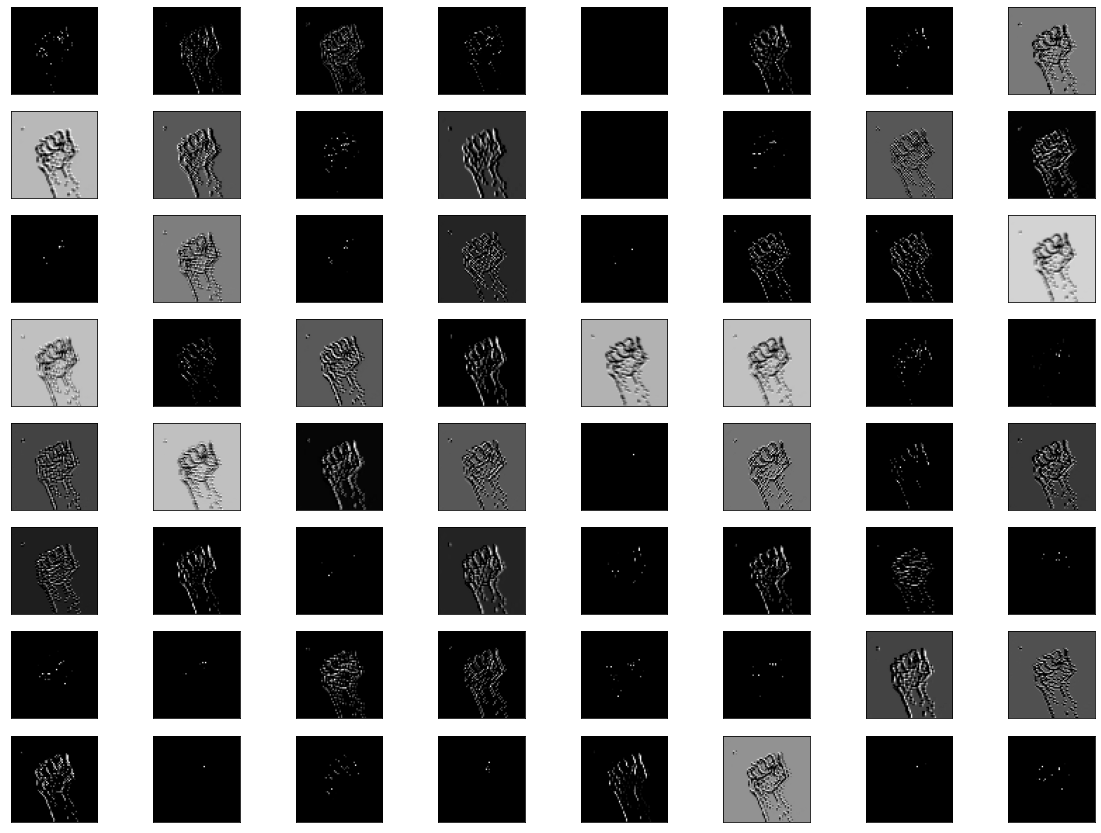

In [25]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

image = load_img("A30.jpg", target_size=(64,64), color_mode="grayscale")

image = img_to_array(image)
image = np.expand_dims(image, axis=0)

features = model.predict(image)
# image = preprocess_input(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features[0,:,:,i-1], cmap='gray')
plt.show()

(1, 64, 64, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 activation_32 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 activation_33 (Activation)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 57, 57, 128)       73856     
                                       

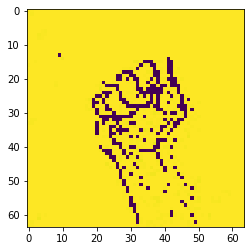

In [81]:
# img = load_img("A30.jpg", target_size=(64,64), color_mode="grayscale")

from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

#Prediction of single image
import numpy as np

img = load_img("A30.jpg", target_size=(64,64), color_mode="grayscale")
image = img_to_array(img)
images = image/255
test_image = np.expand_dims(images, axis = 0)
# image_data = preprocess_input(test_image)
print(test_image.shape)

model = load_model('model_3.h5')
model.summary()
result = model.predict(test_image)
plt.imshow(img)
#training_set.class_indices
# print('Predicted Sign is:')
# print('')
img = np.argmax(model.predict(test_image), axis=1)
print('Prediction:',img)
if img == 0:
    print('A')
elif img == 1:
    print('B')
elif img == 2:
    print('C')
elif img == 3:
    print('D')
elif img == 4:
    print('E')
elif img == 5:
    print('F')
elif img == 6:
    print('G')
elif img == 7:
    print('H')
elif img == 8:
    print('I')
elif img == 9:
    print('J')
elif img == 10:
    print('K')
elif img == 11:
    print('L')
elif img == 12:
    print('M')
elif img == 13:
    print('N')
elif img == 14:
    print('O')
elif img == 15:
    print('P')
elif img == 16:
    print('Q')
elif img == 17:
    print('R')
elif img == 18:
    print('S')
elif img == 19:
    print('T')
elif img == 20:
    print('U')
elif img == 21:
    print('V')
elif img == 22:
    print('W')
elif img == 23:
    print('X')
elif img == 24:
    print('Y')
elif img == 25:
    print('Z')

In [50]:
train_data_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}